# Does dorm matter for well-being?

A: Probably not.

We fit a range of models to predict student's t2 (fall) well-being (measured in week 4 of the semester). Overall, their reported life satisfaction at t1 (measured in week 0, before the semester began) explained most of the variance in t2 life satisfaction (approx 55%), with trace amounts of additional variance explainable by additional variables (approx 3% more). The few variables that remained significant contributors to the model, above and beyond t1 life satisfaction, were: stress at t1, loneliness at t1, number of network nominations (in and out) at t2, and average family income of the person's network nominations. All were in the intuitive directions but very small in size.

Mixed-effects models showed that *none* of the residual variance in life satisfaction could be attributed to membership in particular dorms.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Impute-the-(few)-missing-values-with-mice-package" data-toc-modified-id="Impute-the-(few)-missing-values-with-mice-package-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Impute the (few) missing values with <code>mice</code> package</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Base-models---predict-well-being-at-t1-from-well-being-at-t1" data-toc-modified-id="Base-models---predict-well-being-at-t1-from-well-being-at-t1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Base models - predict well-being at t1 from well-being at t1</a></span><ul class="toc-item"><li><span><a href="#Life-satisfaction" data-toc-modified-id="Life-satisfaction-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Life satisfaction</a></span></li><li><span><a href="#Loneliness" data-toc-modified-id="Loneliness-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Loneliness</a></span></li><li><span><a href="#Stress" data-toc-modified-id="Stress-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Stress</a></span></li></ul></li><li><span><a href="#Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1" data-toc-modified-id="Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fixed-effects models: predict WB at t2 from WB and other personal factors at t1</a></span><ul class="toc-item"><li><span><a href="#From-here-on,-we'll-just-look-at-life-satisfaction" data-toc-modified-id="From-here-on,-we'll-just-look-at-life-satisfaction-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>From here on, we'll just look at life satisfaction</a></span></li></ul></li><li><span><a href="#Covariates-seem-to-matter-very-little---lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures" data-toc-modified-id="Covariates-seem-to-matter-very-little---lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Covariates seem to matter very little - lets reduce our fixed effects model to only wellbeing and in/out degree measures</a></span></li><li><span><a href="#Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)" data-toc-modified-id="Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)</a></span></li></ul></li><li><span><a href="#Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership" data-toc-modified-id="Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add random effect for dorm, see if significant variance is attributable to dorm membership</a></span><ul class="toc-item"><li><span><a href="#Try-again,-with-some-dorm-level-covariates" data-toc-modified-id="Try-again,-with-some-dorm-level-covariates-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Try again, with some dorm-level covariates</a></span></li></ul></li><li><span><a href="#Add-fixed-effects-for-network-(traits-of-people-connected-to-the-individual-via-nominations)" data-toc-modified-id="Add-fixed-effects-for-network-(traits-of-people-connected-to-the-individual-via-nominations)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add fixed effects for network (traits of people connected to the individual via nominations)</a></span></li></ul></div>

## Libraries

In [1]:
library(car)
library(tidyverse)
library(mice)
library(nlme)
library(lme4)
library(lmerTest)

Loading required package: carData

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()

Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘mice’


The following object is masked from ‘package:tidyr’:

    complete


The following objects are masked from ‘package:base’:

    cbind, rbind



Attaching package: ‘nlme’


The following object is mask

In [2]:
df = read.csv('../data/2019–2020/postprocessed/df_full_train.csv', na.strings=c(""," "))
dim(df)
head(df)

[1] 560  57

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,⋯,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,⋯,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,⋯,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,⋯,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,⋯,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,⋯,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,⋯,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


In [3]:
str(df)

'data.frame':	560 obs. of  57 variables:
 $ PID                         : int  1001 1047 1078 1097 1105 1110 1128 1132 1134 1162 ...
 $ gender                      : Factor w/ 3 levels "female","male",..: 2 1 1 2 1 1 1 1 2 1 ...
 $ race                        : Factor w/ 6 levels "black","east_asian",..: 5 4 2 2 6 6 6 NA 3 2 ...
 $ dorm                        : Factor w/ 21 levels "Alondra","Arroyo",..: 16 19 11 15 10 10 7 15 2 3 ...
 $ life_satisfaction_t1        : num  4.83 5.33 5.5 6 6.67 ...
 $ empathy                     : num  6.38 6.5 6.25 5 5.75 ...
 $ loneliness_t1               : num  1.33 2 1.33 2 2 ...
 $ stress_t1                   : num  2.5 2.5 2 2 2 2 1.5 2 1.5 1 ...
 $ BFI_E                       : num  6.5 5.5 4.5 3 4.5 6.5 5 7 5.5 3.5 ...
 $ BFI_A                       : num  6 6.5 6.5 4 5 5 5 5 5 6.5 ...
 $ BFI_O                       : num  6.5 6.5 6.5 4.5 4.5 4.5 5.5 5.5 6 7 ...
 $ BFI_N                       : num  3.5 3 1.5 1.5 2 2 2 2.5 1.5 3 ...
 $ BFI_C      

## Impute the (few) missing values with `mice` package

,PID,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,⋯,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,race,
446,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
49,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
10,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,1,14
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,15
12,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,2
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,16
13,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,1,15
3,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,16
11,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


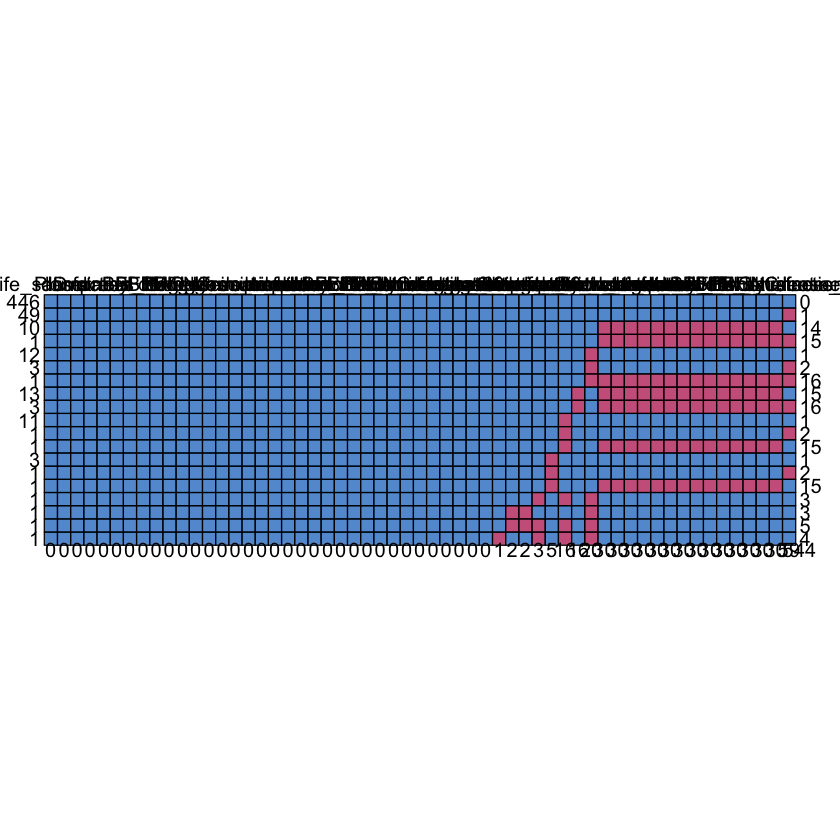

In [4]:
md.pattern(df)

In [5]:
# imputed <- mice(df, m=1)
# df = complete(imputed)
# sum(is.na(df))

In [6]:
dim(df)
df = df[complete.cases(df), ]
dim(df)

[1] 560  57

[1] 446  57

## Model

In [7]:
head(df)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,⋯,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,⋯,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,⋯,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,⋯,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,⋯,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,⋯,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,⋯,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


### Base models - predict well-being at t1 from well-being at t1

#### Life satisfaction

In [8]:
base_model_ls_only = lm(life_satisfaction_t2 ~ life_satisfaction_t1, df)
summary(base_model_ls_only)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9949 -0.4698  0.0501  0.5383  3.4022 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.96427    0.17395   5.543  5.1e-08 ***
life_satisfaction_t1  0.78012    0.03373  23.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8138 on 444 degrees of freedom
Multiple R-squared:  0.5464,	Adjusted R-squared:  0.5454 
F-statistic: 534.8 on 1 and 444 DF,  p-value: < 2.2e-16


In [9]:
base_model_ls <- lm(life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + stress_t1, df)
summary(base_model_ls)
Anova(base_model_ls)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + 
    stress_t1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0780 -0.4706  0.0397  0.5191  3.2860 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.03651    0.35713   5.703 2.16e-08 ***
life_satisfaction_t1  0.71065    0.03937  18.050  < 2e-16 ***
loneliness_t1        -0.15446    0.08232  -1.876  0.06126 .  
stress_t1            -0.21418    0.07755  -2.762  0.00598 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8046 on 442 degrees of freedom
Multiple R-squared:  0.5586,	Adjusted R-squared:  0.5556 
F-statistic: 186.4 on 3 and 442 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
life_satisfaction_t1,210.912907,1,325.801785,5.782033e-55
loneliness_t1,2.279249,1,3.520805,6.126168e-02
stress_t1,4.938661,1,7.628859,5.983614e-03
Residuals,286.135647,442,NA,NA


In [10]:
anova(base_model_ls_only, base_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,444,294.0296,NA,NA,NA,NA
2,442,286.1356,2,7.893915,6.096952,0.002443397


In [11]:
r1 = summary(base_model_ls_only)$adj.r.squared
r2 = summary(base_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.545375011452107"
[1] "After: 0.555578590251331"
[1] "Partial r² (adjusted): 0.0224439462331682"


#### Loneliness

In [12]:
base_model_loneliness_only = lm(loneliness_t2 ~ loneliness_t1, df)
summary(base_model_loneliness_only)


Call:
lm(formula = loneliness_t2 ~ loneliness_t1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21448 -0.35398 -0.02065  0.31268  1.56084 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.85767    0.08599   9.974   <2e-16 ***
loneliness_t1  0.58149    0.04551  12.777   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5032 on 444 degrees of freedom
Multiple R-squared:  0.2688,	Adjusted R-squared:  0.2672 
F-statistic: 163.2 on 1 and 444 DF,  p-value: < 2.2e-16


In [13]:
base_model_loneliness <- lm(loneliness_t2 ~ loneliness_t1 + life_satisfaction_t1 + stress_t1, df)
summary(base_model_loneliness)
Anova(base_model_loneliness)


Call:
lm(formula = loneliness_t2 ~ loneliness_t1 + life_satisfaction_t1 + 
    stress_t1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15554 -0.36265 -0.02359  0.32454  1.55979 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.88483    0.22059   4.011 7.09e-05 ***
loneliness_t1         0.51348    0.05085  10.099  < 2e-16 ***
life_satisfaction_t1 -0.03501    0.02432  -1.440  0.15064    
stress_t1             0.13182    0.04790   2.752  0.00616 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.497 on 442 degrees of freedom
Multiple R-squared:   0.29,	Adjusted R-squared:  0.2852 
F-statistic: 60.18 on 3 and 442 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
loneliness_t1,25.1878497,1,101.98320,1.028724e-21
life_satisfaction_t1,0.5119779,1,2.07295,1.506391e-01
stress_t1,1.8708220,1,7.57478,6.162618e-03
Residuals,109.1653241,442,NA,NA


In [14]:
anova(base_model_loneliness_only, base_model_loneliness)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,444,112.4242,NA,NA,NA,NA
2,442,109.1653,2,3.258921,6.59753,0.001501983


In [15]:
r1 = summary(base_model_loneliness_only)$adj.r.squared
r2 = summary(base_model_loneliness)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.26718067274462"
[1] "After: 0.285203619332702"
[1] "Partial r² (adjusted): 0.0245939836979774"


#### Stress

In [16]:
base_model_stress_only = lm(stress_t2 ~ stress_t1, df)
summary(base_model_stress_only)


Call:
lm(formula = stress_t2 ~ stress_t1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33436 -0.33436 -0.07822  0.40951  1.43404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.05369    0.09738   10.82   <2e-16 ***
stress_t1    0.51227    0.04565   11.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.512 on 444 degrees of freedom
Multiple R-squared:  0.221,	Adjusted R-squared:  0.2192 
F-statistic: 125.9 on 1 and 444 DF,  p-value: < 2.2e-16


In [17]:
base_model_stress <- lm(stress_t2 ~ stress_t1 + life_satisfaction_t1 + loneliness_t1, df)
summary(base_model_stress)
Anova(base_model_stress)


Call:
lm(formula = stress_t2 ~ stress_t1 + life_satisfaction_t1 + loneliness_t1, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2349 -0.3410 -0.0624  0.3777  1.3373 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.34296    0.22589   5.945 5.61e-09 ***
stress_t1             0.46183    0.04905   9.416  < 2e-16 ***
life_satisfaction_t1 -0.05121    0.02490  -2.056   0.0403 *  
loneliness_t1         0.03992    0.05207   0.767   0.4437    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5089 on 442 degrees of freedom
Multiple R-squared:  0.2337,	Adjusted R-squared:  0.2285 
F-statistic: 44.94 on 3 and 442 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
stress_t1,22.9612950,1,88.6526034,2.618427e-19
life_satisfaction_t1,1.0952992,1,4.2289047,4.032761e-02
loneliness_t1,0.1522373,1,0.5877817,4.436875e-01
Residuals,114.4793498,442,NA,NA


In [18]:
anova(base_model_stress_only, base_model_stress)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,444,116.3825,NA,NA,NA,NA
2,442,114.4793,2,1.903199,3.674086,0.02615069


In [19]:
r1 = summary(base_model_stress_only)$adj.r.squared
r2 = summary(base_model_stress)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.219217716785922"
[1] "After: 0.228510639382522"
[1] "Partial r² (adjusted): 0.0119020664228524"


### Fixed-effects models: predict WB at t2 from WB and other personal factors at t1

#### From here on, we'll just look at life satisfaction

In [20]:
fixed_params = "
life_satisfaction_t1 + loneliness_t1 + stress_t1 +
edges_in + edges_out +
C(gender) + C(race) + empathy +
BFI_E + BFI_O + BFI_C + BFI_A + BFI_N +
intl_student + parent_education_highest + log10(family_income)"

make_model = function(dv) {
    model = lm(as.formula(paste(dv, '~', fixed_params)), df)
}

In [21]:
fixed_model_ls = make_model("life_satisfaction_t2")
summary(fixed_model_ls)


Call:
lm(formula = as.formula(paste(dv, "~", fixed_params)), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.63253 -0.45686  0.06504  0.49513  3.05554 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 0.672343   0.812691   0.827
life_satisfaction_t1                        0.666423   0.043067  15.474
loneliness_t1                              -0.154953   0.088115  -1.759
stress_t1                                  -0.188604   0.093090  -2.026
edges_in                                    0.034702   0.014679   2.364
edges_out                                   0.018156   0.009017   2.013
C(gender)male                              -0.054915   0.085776  -0.640
C(gender)other                              0.268078   0.585025   0.458
C(race)east_asian                           0.204444   0.137423   1.488
C(race)hispanic                             0.238012   0.152291   1.563
C(race)other_or_

In [22]:
anova(base_model_ls, fixed_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,442,286.1356,NA,NA,NA,NA
2,420,264.9246,22,21.21109,1.528507,0.06033677


In [23]:
r1 = summary(base_model_ls)$adj.r.squared
r2 = summary(fixed_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.555578590251331"
[1] "After: 0.566969791289822"
[1] "Partial r² (adjusted): 0.0256315307692594"


### Covariates seem to matter very little - lets reduce our fixed effects model to only wellbeing and in/out degree measures

In [24]:
fixed_model_ls_inout = lm(life_satisfaction_t2 ~ life_satisfaction_t1 +
                          loneliness_t1 + stress_t1 + edges_in + edges_out,
                          df)
summary(fixed_model_ls_inout)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + 
    stress_t1 + edges_in + edges_out, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.99725 -0.44996  0.03372  0.50615  3.14464 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.734649   0.363061   4.778 2.42e-06 ***
life_satisfaction_t1  0.704199   0.039042  18.037  < 2e-16 ***
loneliness_t1        -0.144673   0.081879  -1.767  0.07794 .  
stress_t1            -0.208110   0.076715  -2.713  0.00693 ** 
edges_in              0.028309   0.013799   2.052  0.04081 *  
edges_out             0.020117   0.008888   2.263  0.02410 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7951 on 440 degrees of freedom
Multiple R-squared:  0.5709,	Adjusted R-squared:  0.566 
F-statistic: 117.1 on 5 and 440 DF,  p-value: < 2.2e-16


In [25]:
anova(base_model_ls, fixed_model_ls_inout)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,442,286.1356,NA,NA,NA,NA
2,440,278.1352,2,8.000491,6.328247,0.001951922


In [26]:
r1 = summary(base_model_ls)$adj.r.squared
r2 = summary(fixed_model_ls_inout)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.555578590251331"
[1] "After: 0.566041213494675"
[1] "Partial r² (adjusted): 0.0235421224401872"


### Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)

In [27]:
df$residuals = fixed_model_ls$residuals

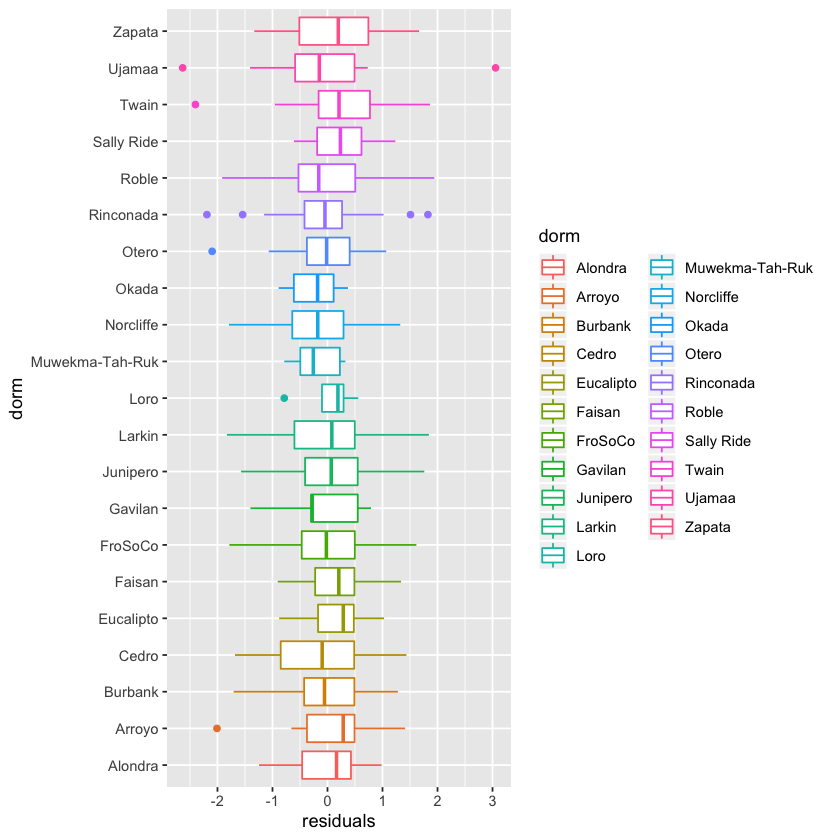

In [28]:
ggplot(data=df, mapping=aes(dorm, residuals)) + 
  geom_boxplot(aes(color=dorm)) + coord_flip()

## Add random effect for dorm, see if significant variance is attributable to dorm membership

In [29]:
mixed_model_ls = lmer(as.formula(paste('life_satisfaction_t2 ~', fixed_params, "+ (1|dorm)")), df)
summary(mixed_model_ls)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
as.formula(paste("life_satisfaction_t2 ~", fixed_params, "+ (1|dorm)"))
   Data: df

REML criterion at convergence: 1122.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3146 -0.5752  0.0819  0.6234  3.8473 

Random effects:
 Groups   Name        Variance Std.Dev.
 dorm     (Intercept) 0.0000   0.0000  
 Residual             0.6308   0.7942  
Number of obs: 446, groups:  dorm, 21

Fixed effects:
                                             Estimate Std. Error         df
(Intercept)                                  0.672343   0.812691 420.000000
life_satisfaction_t1                         0.666423   0.043067 420.000000
loneliness_t1                               -0.154953   0.088115 420.000000
stress_t1                                   -0.188604   0.093090 420.000000
edges_in                                     0.034702   0.014679 420.000000
edges_out                       

### Try again, with some dorm-level covariates

In [30]:
mixed_model_ls_with_l2_covariates = lmer(as.formula(paste(
    'life_satisfaction_t2 ~', fixed_params,
    "+ (1 + BFI_E + life_satisfaction_t1|dorm)")),
    df)
summary(mixed_model_ls_with_l2_covariates)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
as.formula(paste("life_satisfaction_t2 ~", fixed_params, "+ (1 + BFI_E + life_satisfaction_t1|dorm)"))
   Data: df

REML criterion at convergence: 1122.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3146 -0.5752  0.0819  0.6234  3.8471 

Random effects:
 Groups   Name                 Variance  Std.Dev.  Corr       
 dorm     (Intercept)          6.787e-05 0.0082384            
          BFI_E                1.113e-07 0.0003336  0.98      
          life_satisfaction_t1 3.975e-06 0.0019937 -1.00 -0.99
 Residual                      6.308e-01 0.7942092            
Number of obs: 446, groups:  dorm, 21

Fixed effects:
                                             Estimate Std. Error         df
(Intercept)                                  0.672278   0.812692 419.958050
life_satisfaction_t1                         0.666424   0.043069 378.015380
loneliness_t1                     

In [31]:
anova(mixed_model_ls, mixed_model_ls_with_l2_covariates, refit=FALSE)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model_ls,28,1178.874,1293.683,-561.4369,1122.874,NA,NA,NA
mixed_model_ls_with_l2_covariates,33,1188.874,1324.184,-561.4369,1122.874,0,5,1


## Add fixed effects for network (traits of people connected to the individual via nominations)

In [32]:
network_model_ls = lm(paste("life_satisfaction_t2 ~ ", fixed_params, "
                            network_life_satisfaction_t1 + network_loneliness_t1 + network_stress_t1 +
                            network_empathy +
                            network_BFI_E + network_BFI_O + network_BFI_C + network_BFI_A + network_BFI_N +
                            network_intl_student + log10(network_family_income)"),
                          df)
summary(network_model_ls)


Call:
lm(formula = paste("life_satisfaction_t2 ~ ", fixed_params, "\n                            network_life_satisfaction_t1 + network_loneliness_t1 + network_stress_t1 +\n                            network_empathy +\n                            network_BFI_E + network_BFI_O + network_BFI_C + network_BFI_A + network_BFI_N +\n                            network_intl_student + log10(network_family_income)"), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.63253 -0.45686  0.06504  0.49513  3.05554 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 0.672343   0.812691   0.827
life_satisfaction_t1                        0.666423   0.043067  15.474
loneliness_t1                              -0.154953   0.088115  -1.759
stress_t1                                  -0.188604   0.093090  -2.026
edges_in                                    0.034702   0.014679   2.364
edges_out           

In [33]:
anova(fixed_model_ls_inout, network_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,440,278.1352,NA,NA,NA,NA
2,420,264.9246,20,13.2106,1.047176,0.4046776


In [34]:
r1 = summary(fixed_model_ls_inout)$adj.r.squared
r2 = summary(network_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.566041213494675"
[1] "After: 0.566969791289822"
[1] "Partial r² (adjusted): 0.00213978337119229"


In [35]:
network_model_ls = lm(life_satisfaction_t2 ~ life_satisfaction_t1 +
                          loneliness_t1 + stress_t1 + edges_in + edges_out +
                            log10(family_income) + log10(network_family_income),
                          df)
summary(network_model_ls)


Call:
lm(formula = life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + 
    stress_t1 + edges_in + edges_out + log10(family_income) + 
    log10(network_family_income), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6944 -0.4596  0.0597  0.4998  2.9867 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -0.851897   0.895415  -0.951  0.34193    
life_satisfaction_t1          0.674378   0.039948  16.881  < 2e-16 ***
loneliness_t1                -0.134706   0.081273  -1.657  0.09815 .  
stress_t1                    -0.216289   0.076090  -2.843  0.00468 ** 
edges_in                      0.031784   0.013704   2.319  0.02084 *  
edges_out                     0.016710   0.008862   1.886  0.06002 .  
log10(family_income)          0.171151   0.104228   1.642  0.10129    
log10(network_family_income)  0.374625   0.171435   2.185  0.02940 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

In [42]:
anova(base_model_ls_only, network_model_ls)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,444,294.0296,NA,NA,NA,NA
2,438,271.4094,6,22.62021,6.084077,3.903688e-06


In [41]:
r1 = summary(base_model_ls_only)$adj.r.squared
r2 = summary(network_model_ls)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.545375011452107"
[1] "After: 0.574601483104008"
[1] "Partial r² (adjusted): 0.0642869890307892"
